# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [26]:
import pandas as pd

In [27]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [28]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

station = pd.read_csv('data/df_seoul_bus_station.csv')
moving = pd.read_csv('data/df_seoul_moving.csv')
business = pd.read_csv('data/df_seoul_business.csv')
people = pd.read_csv('data/df_seoul_people.csv')

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [30]:
station.sort_values('노선수', ascending=False)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
13,서대문구,456,107,5863499,5796960,109.914502,108.667192
22,종로구,349,106,5468935,5205394,131.889620,125.534028
23,중구,178,103,3776675,3598932,121.020124,115.324511
19,영등포구,465,101,5739875,5783211,120.337855,121.246404
16,성북구,602,99,6236424,6231238,123.251922,123.149430
12,마포구,562,97,5088461,4957596,103.907639,101.235343
11,동작구,438,94,5314274,5112276,124.295965,119.571419
14,서초구,600,93,7221330,6977950,126.687777,122.418028
0,강남구,499,91,8030483,7569213,128.767927,121.371512
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [31]:
moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),자치구
0,11010,9356120,19385709.60,21.349599,44.235978,종로구
1,11020,9306020,19715322.61,21.012462,44.516072,중구
2,11030,8514380,14707082.87,21.364786,36.903883,용산구
3,11040,8887140,17449273.95,21.740324,42.685596,성동구
4,11050,8625540,17947278.99,22.474283,46.762548,광진구


In [32]:
business.head() # name : 사업체수, name.1 : 종사자수 -> 종사자수가 중요해보임

,자치구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,215,215,"1,548","5,912",618,646,549,889,261,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
1,중구,230,235,"1,588","6,414",300,333,576,"1,152",339,...,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
2,용산구,416,523,857,"2,987",455,466,791,"1,214",366,...,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
3,성동구,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",489,...,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"
4,광진구,"1,119","1,744",963,"2,861",968,985,871,"1,313",746,...,590,"1,887",89,687,633,"1,577",413,"1,646",467,"1,678"


In [33]:
business.columns[business.columns.unique().str.contains('.1')]

Index(['택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1',
       '두발미용업.1', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1',
       '한식 육류요리 전문점.1'],
      dtype='object')

In [34]:
business = business[['자치구', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1',
       '두발미용업.1', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1',
       '한식 육류요리 전문점.1']]

In [35]:
business.head()

,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,종로구,215,"5,912",646,889,480,"3,613",962,"1,413",382,"1,982"
1,중구,235,"6,414",333,"1,152",816,"3,542","24,248",982,175,"2,121"
2,용산구,523,"2,987",466,"1,214",777,"2,076",317,"1,332",573,"1,184"
3,성동구,"2,527","2,785","1,161","1,453",851,"1,859","1,572",621,"1,494","1,545"
4,광진구,"1,744","2,861",985,"1,313","1,337","1,887",687,"1,577","1,646","1,678"


In [36]:
people.head()

,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [37]:
business.columns

Index(['자치구', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1',
       '두발미용업.1', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1',
       '한식 육류요리 전문점.1'],
      dtype='object')

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.merge(station, moving, how='inner' , on = '자치구')
df = pd.merge(df, business, how='inner' , on = '자치구')
#df = pd.merge(df, people, how='inner' , on = '자치구')
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,총 이동 시간,총 이동 인구,...,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,강남구,499,91,8030483,7569213,128.767927,121.371512,11230,11437560,44684651.43,...,"2,517","11,486",487,"6,508","6,255","7,273","8,320","2,528","9,020","5,008"
1,강동구,369,21,2890053,2830506,99.161194,97.118065,11250,8430800,21101460.33,...,"4,980","3,388","1,566","1,990","1,429","1,660","1,433","1,349","2,104","1,459"
2,강북구,413,67,4825181,4671783,133.020373,128.791504,11090,7649610,12570412.30,...,"2,589","2,663","1,030",867,997,"1,095",94,"1,275",740,"1,176"
3,강서구,566,49,4681083,4652828,88.119480,87.587591,11160,9388010,21839762.06,...,"6,922","4,584","1,862","2,352","1,751","2,530",700,"1,709","2,347","2,274"
4,관악구,466,86,7655819,7792476,154.753674,157.516040,11210,8772170,18725641.04,...,"2,027","3,689","1,600","2,136","1,604","2,049",190,"1,672","1,230","1,628"


---

In [10]:
df1['노선/이동인구'] = df1['노선수']/df1['이동인구(합)']

#노선수가 많으면 쾌적 (비례)
#이동인구가 적으면 쾌적 (반비례)
#-> df1['노선/이동인구'] 높게 나오면 쾌적

In [39]:
station['승차-하차'] = station['승차평균승객수'] - station['하차평균승객수']

In [40]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [26]:
# def eda1_n(data, var, bins = 20) :
#     display(data[[var]].describe().T) 
#     plt.figure(figsize = (12,8)) 
#     plt.subplot(2,1,1) 
#     sns.histplot(data[var], bins = bins, kde = True)
#     plt.subplot(2,1,2) 
#     sns.boxplot(x= data[var]) 
#     plt.grid() 
#     plt.tight_layout() 
#     plt.show()
    
# eda1_n(station, '정류장수')

In [27]:
# sns.pairplot(station)
# plt.show()

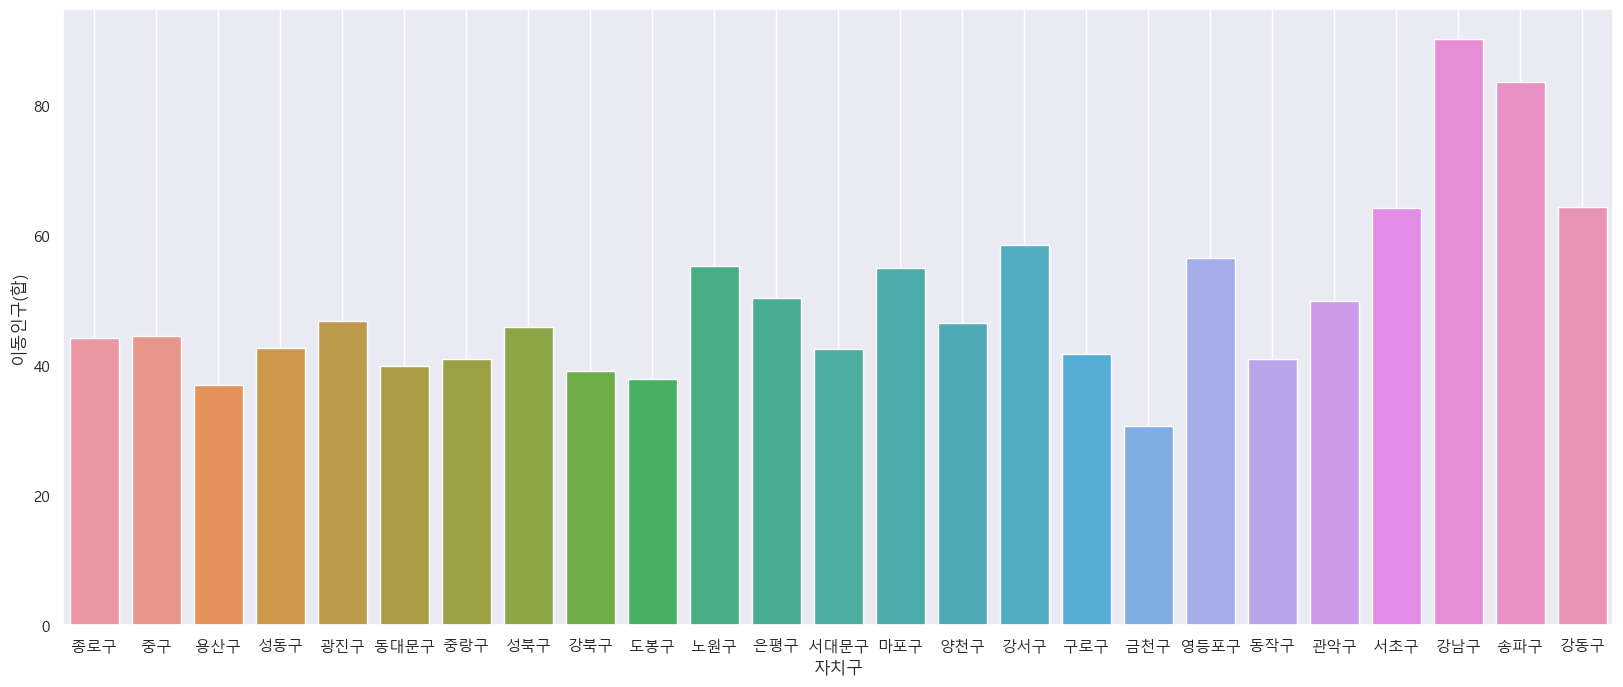

In [46]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='이동인구(합)', data = moving)
plt.grid()
plt.show()

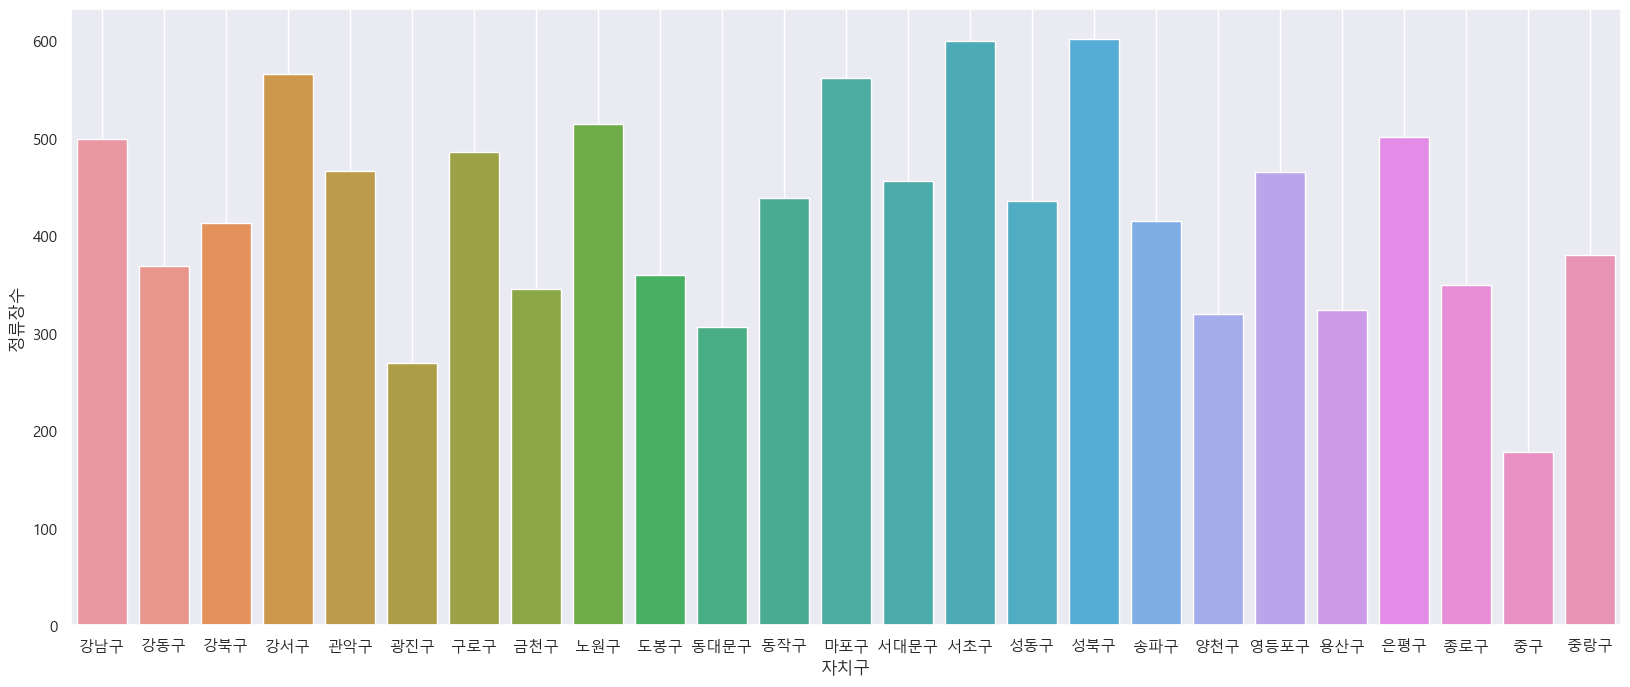

In [47]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='정류장수', data = station)
plt.grid()
plt.show()

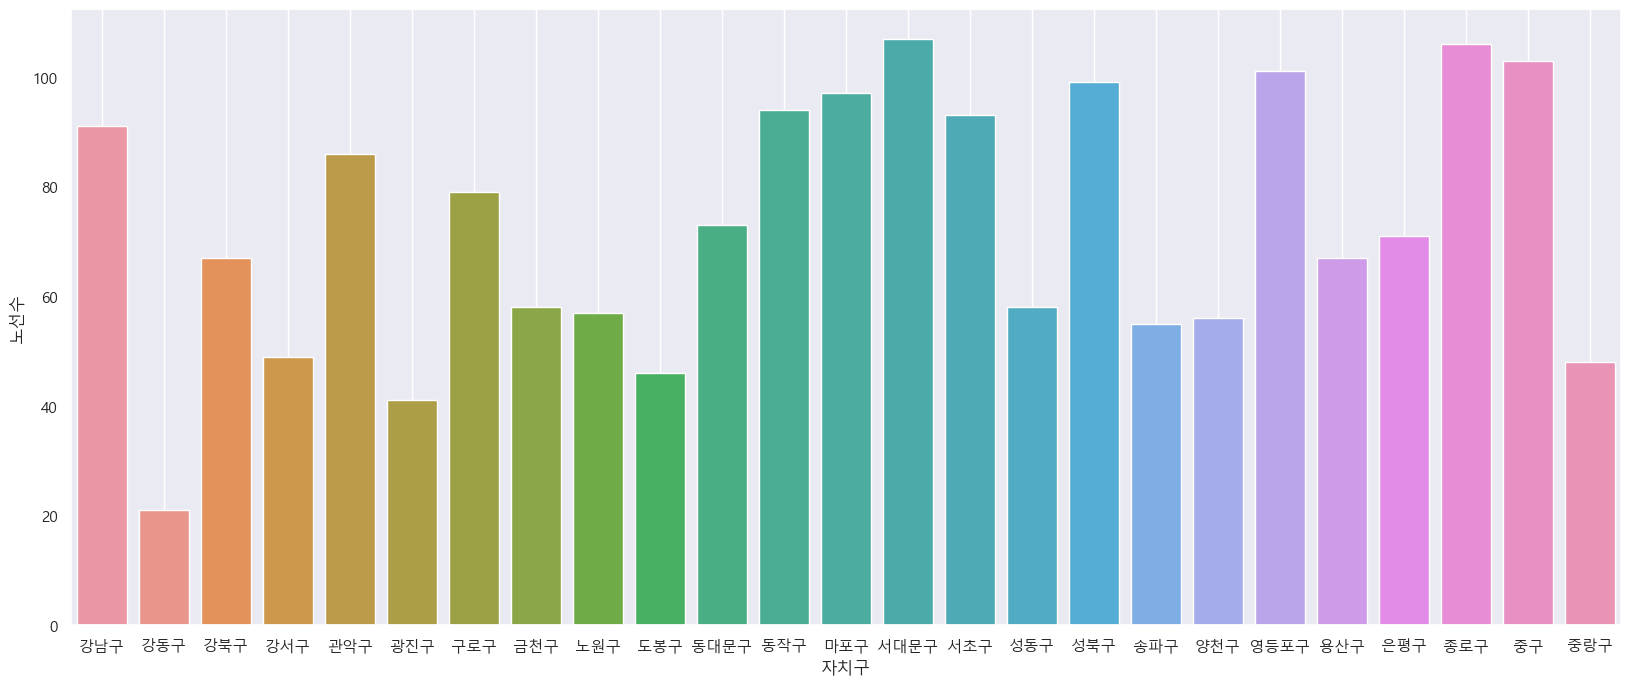

In [51]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='노선수', data = station)
plt.grid()
plt.show()

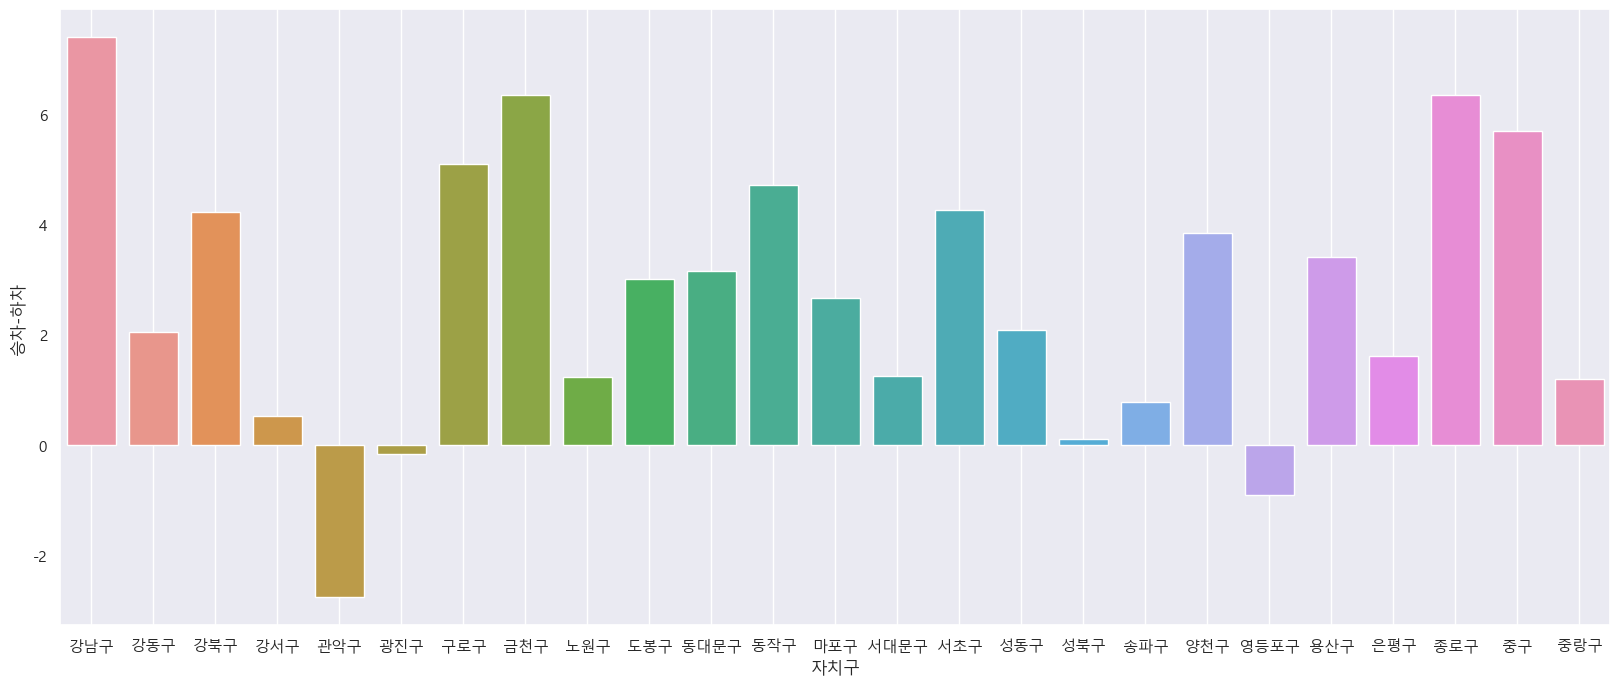

In [50]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='승차-하차', data = station)
plt.grid()
plt.show()

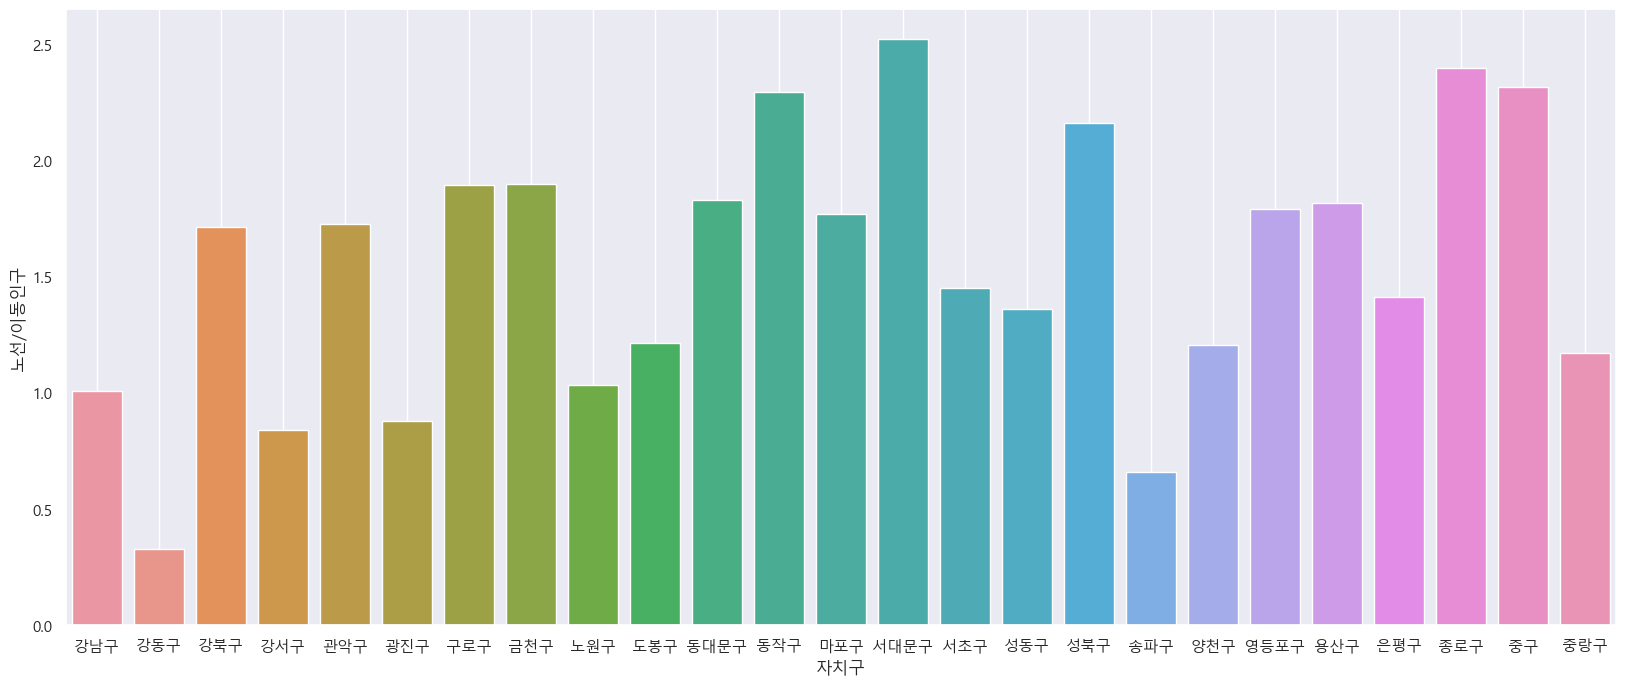

In [64]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='노선/이동인구', data = df1)
plt.grid()
plt.show()

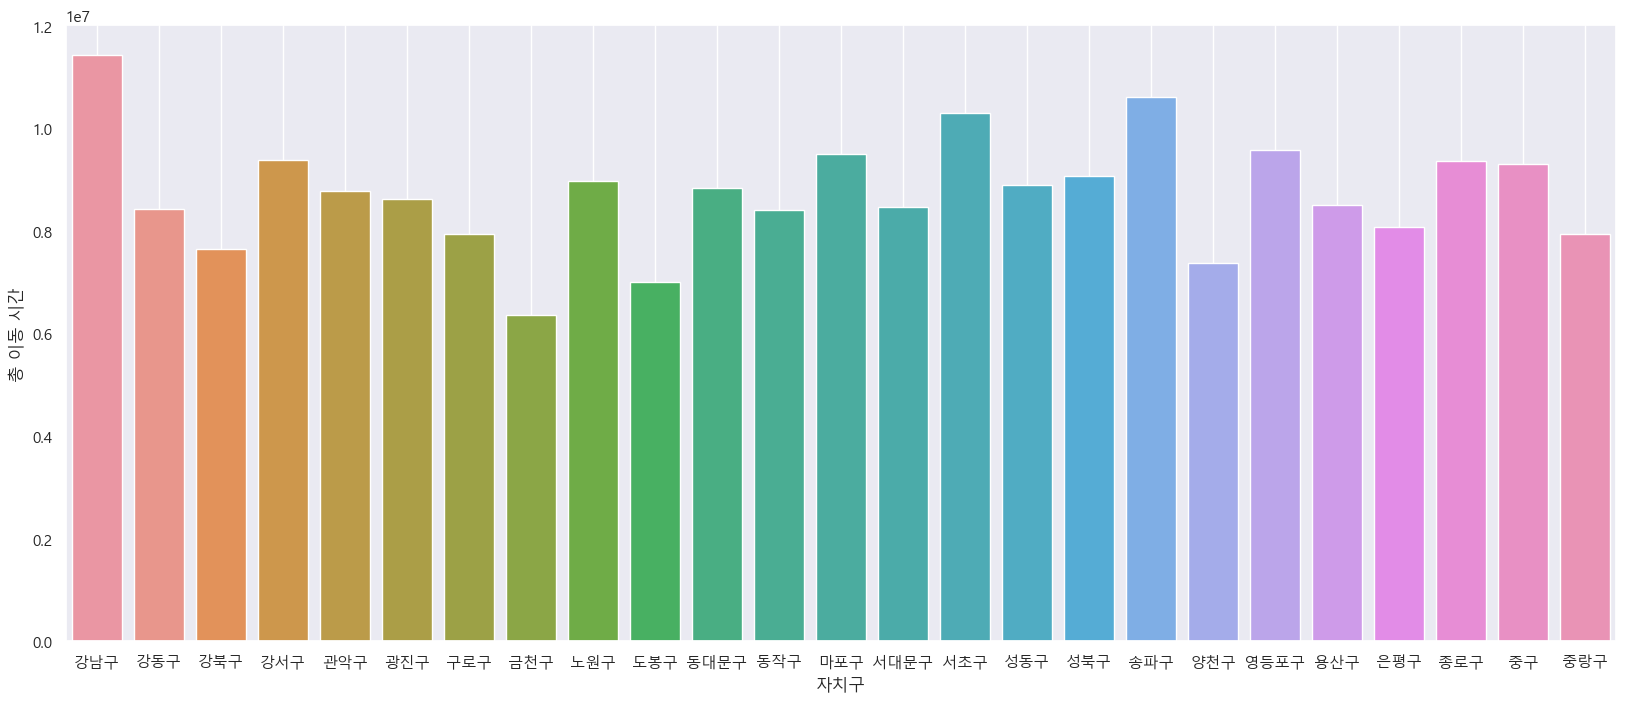

In [74]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='총 이동 시간', data = df1)
plt.grid()
plt.show()

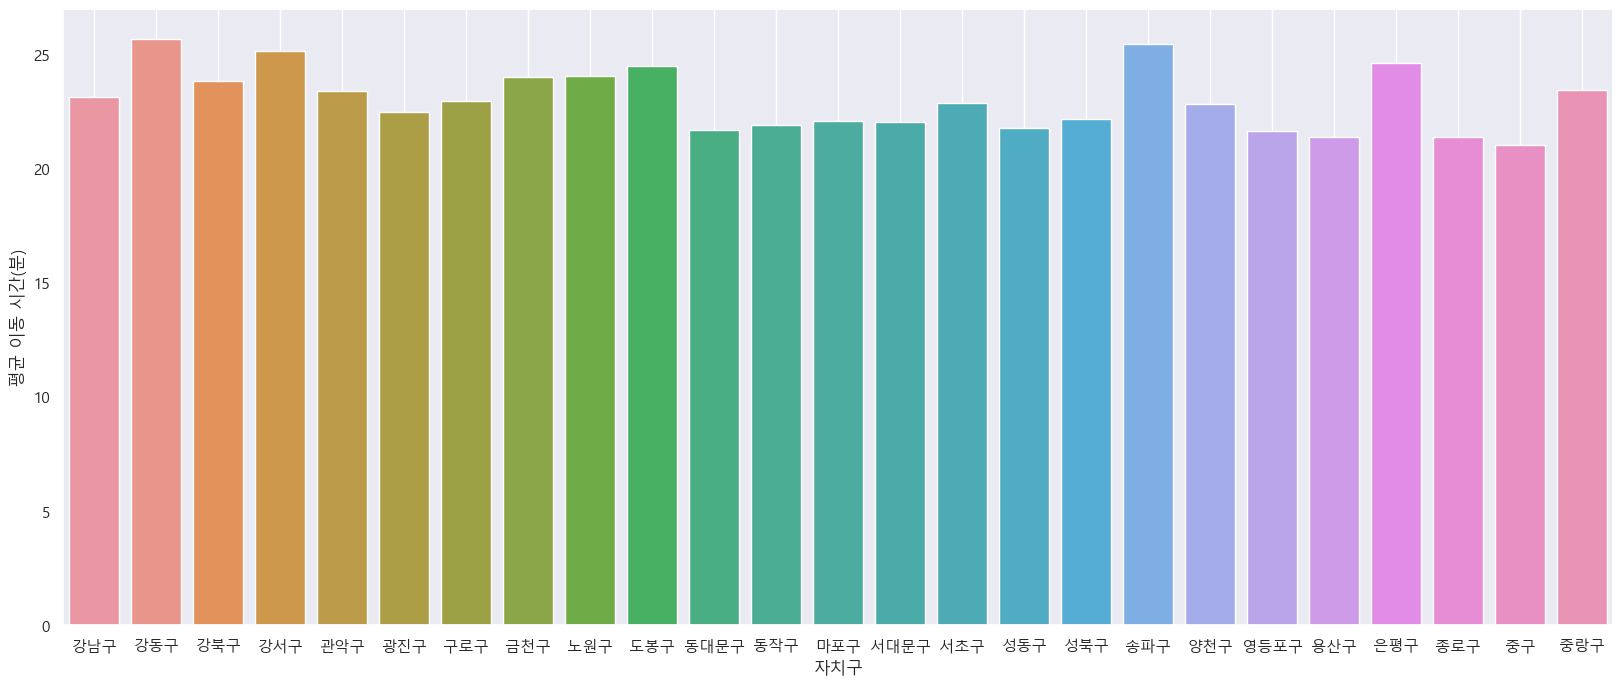

In [75]:
sns.set(rc = {'figure.figsize':(20,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x='자치구', y='평균 이동 시간(분)', data = df1)
plt.grid()
plt.show()

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다          
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다         
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다        

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

승차수가 많은 곳이 일자리 구역      
하차수가 많은 곳이 거주 구역

station : 승차-하차

business(종사자수)로 일자리 구역 산업, 거주 구역 산업 밀집되어있는지 확인

-> 일자리구역에 설치해야되는지 거주 구역에 설치해야되는지

In [14]:
business

,자치구,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,두발미용업,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,215,215,"1,548","5,912",618,646,549,889,261,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
1,중구,230,235,"1,588","6,414",300,333,576,"1,152",339,...,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
2,용산구,416,523,857,"2,987",455,466,791,"1,214",366,...,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
3,성동구,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",489,...,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"
4,광진구,"1,119","1,744",963,"2,861",968,985,871,"1,313",746,...,590,"1,887",89,687,633,"1,577",413,"1,646",467,"1,678"
5,동대문구,"1,546","2,093","1,236","3,566","1,431","1,456",842,"1,208",611,...,494,"1,472",211,976,499,"1,082",302,984,442,"1,509"
6,중랑구,"3,634","6,262",991,"2,479","1,804","1,877",738,"1,104",790,...,381,"1,037",63,284,535,"1,000",288,"1,045",499,"1,504"
7,성북구,"1,835","2,643",973,"2,822","1,312","1,335",846,"1,175",739,...,457,"1,384",85,454,512,"1,030",464,"1,755",365,"1,334"
8,강북구,"1,713","2,589",965,"2,663","1,024","1,030",589,867,673,...,358,"1,095",40,94,580,"1,275",220,740,362,"1,176"
9,도봉구,"2,993","5,783",672,"2,009","1,571","1,574",515,794,600,...,288,837,22,43,258,477,351,"1,162",302,943


* 가설 2

station : 노선수 / moving : 이동인구 합 

이 높으면 쾌적

->Feature 제작

* 가설 3

평균 이동 시간(분) 이 높은 곳에 교통 체증이거나 

버스 시설 추가 필요 대상 지역 후보

->y : 평균 이동 시간(분) 로 하여 미래 (ex. 1년뒤) 예측 프로젝트

* 가설 4

1.2 데이터프레임에서 '도착자치구', '출발자치구' 사이 거리와 '평균 이동 시간(분)' 비교

'도착자치구' == '출발자치구' 인 구역 삭제

->목표 : top5 노선 선별 프로젝트

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [12]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [65]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(df1['노선수'],df1['이동인구(합)'])

PearsonRResult(statistic=-0.0036491990444958433, pvalue=0.9861878215000326)

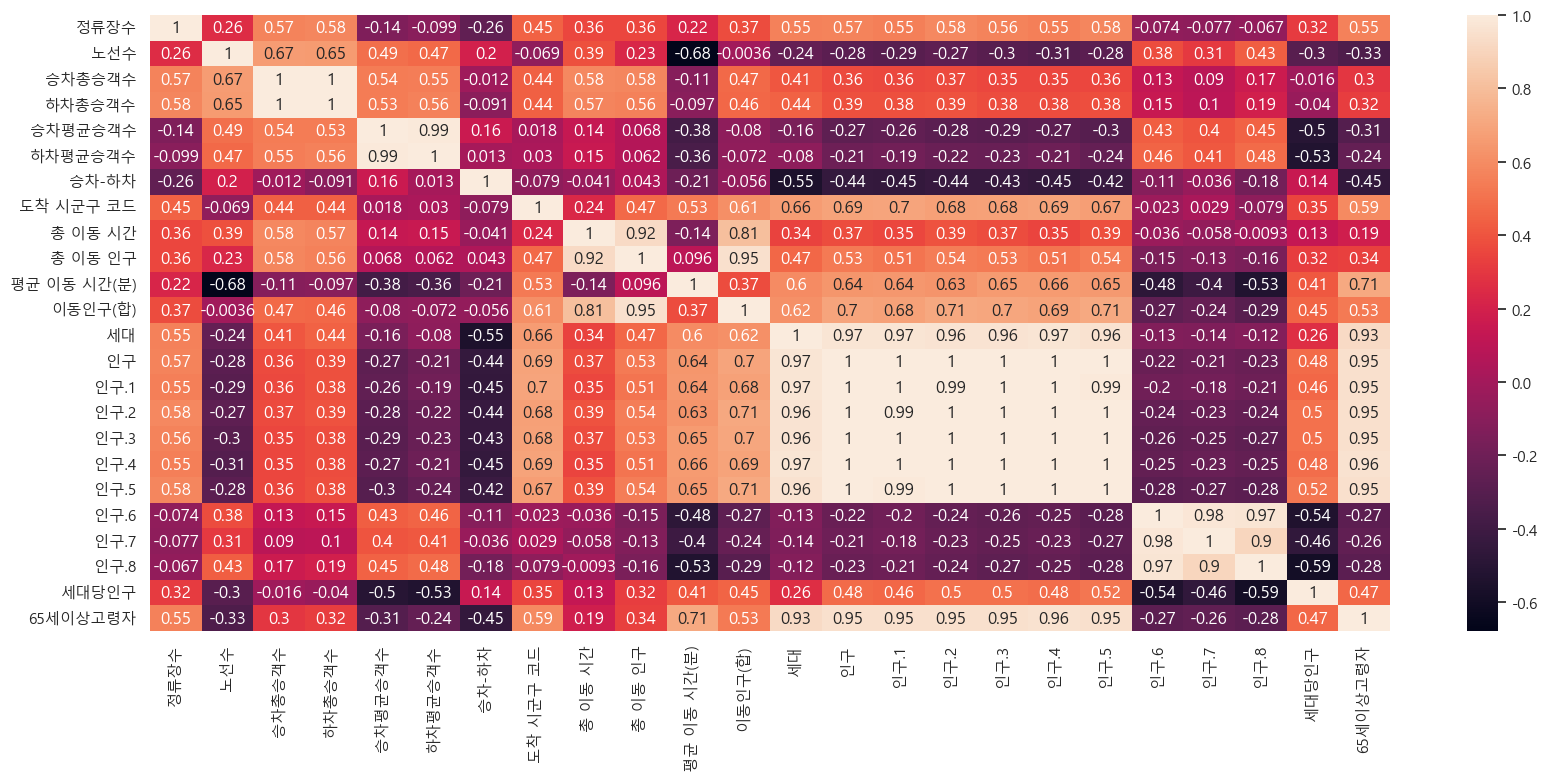

In [76]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df1.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?